## NLP Project

* Research Questions and how NLP can help us to adress these questions? --> **Done**
* Why is this task important? --> **Done**
* Preprocessing --> **Done**
* Data exploration (e.g word clouds, frequencies (bar plot) of the topics) --> **Done**
* Model (start with logistic regression and infer some results --> check text classification problem) --> **Done**
* Evaluate the results by usng proper metric, construct confusion matrices use cross validation to have metric estimation --> **Done**
* Add different models like CNN and Bert, motivate the choices and interpret the results not just using metrics also reverse transforming and make comment if some of the classes don't work well
* Conclusion

**Research Questions**

- Which particular words affect the topics of the scientific papers most and how do they affect the outcome of the prediction?
- Is there field specific (scientific paper) stopwords? If yes, what are those?
- Some topics overlap, are traditional machine learning models are good enough to distinguish these differences?
- Deep learning models (CNN,BERT) outperform the traditional ml models? If yes what is the performance difference?
- What is the descriptive words for individual topics

**Why is this task important?**

With the large volumes of scientific papers, finding relevant ones for a particular research topic can be daunting task. An approach that helps to tag or classify these scientific papers into their topic can ease the search and retrieval process. This study present NLP base solution to classify the given scientific papers' title and abstract into given 6 different topic.

**Also to improve discoverability** --> put with nicer English

In [1]:
 # import libraries
%reset -f
import numpy as np
import pandas as pd
import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # just for the wordcloud images
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from sklearn.preprocessing import LabelEncoder

### Data Exploration

In [2]:
df = pd.read_csv("../data/train.csv",index_col=0)
df.head(8)

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
ID,,,,,,,,
1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0
7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,0,1,0,0,0,0
8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,0,1,0,0,0,0


In [3]:
# Some examples from data
print(df.loc[4].TITLE,"\n")
print(df.loc[4].ABSTRACT)

A finite element approximation for the stochastic Maxwell--Landau--Lifshitz--Gilbert system 

  The stochastic Landau--Lifshitz--Gilbert (LLG) equation coupled with the
Maxwell equations (the so called stochastic MLLG system) describes the creation
of domain walls and vortices (fundamental objects for the novel nanostructured
magnetic memories). We first reformulate the stochastic LLG equation into an
equation with time-differentiable solutions. We then propose a convergent
$\theta$-linear scheme to approximate the solutions of the reformulated system.
As a consequence, we prove convergence of the approximate solutions, with no or
minor conditions on time and space steps (depending on the value of $\theta$).
Hence, we prove the existence of weak martingale solutions of the stochastic
MLLG system. Numerical results are presented to show applicability of the
method.



In [4]:
# this article has more than one label (Computer Science, Statistics), how many articles are like that?
print(df.loc[5].TITLE,"\n")
print(df.loc[5].ABSTRACT)

Comparative study of Discrete Wavelet Transforms and Wavelet Tensor Train decomposition to feature extraction of FTIR data of medicinal plants 

  Fourier-transform infra-red (FTIR) spectra of samples from 7 plant species
were used to explore the influence of preprocessing and feature extraction on
efficiency of machine learning algorithms. Wavelet Tensor Train (WTT) and
Discrete Wavelet Transforms (DWT) were compared as feature extraction
techniques for FTIR data of medicinal plants. Various combinations of signal
processing steps showed different behavior when applied to classification and
clustering tasks. Best results for WTT and DWT found through grid search were
similar, significantly improving quality of clustering as well as
classification accuracy for tuned logistic regression in comparison to original
spectra. Unlike DWT, WTT has only one parameter to be tuned (rank), making it a
more versatile and easier to use as a data processing tool in various signal
processing applicati

In [5]:
df.describe()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,0.409784,0.286716,0.267881,0.248236,0.027990,0.011873
std,0.491806,0.452238,0.442866,0.432000,0.164947,0.108317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


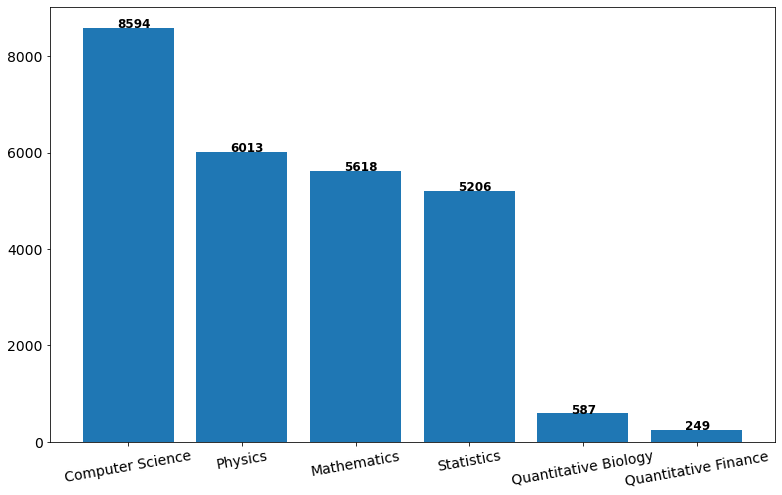

In [6]:
countOfTopics = df.iloc[:,2:].sum(axis=0)
plt.figure(figsize = (13,8))
plt.bar(countOfTopics.index, countOfTopics.values)
plt.xticks(rotation=10)

plt.rcParams.update({'font.size': 12})
xlocs, xlabs = plt.xticks()
xlocs=[i for i in range(0,6)]

for i, v in enumerate(countOfTopics.values):
    plt.text(xlocs[i] - 0.10, v + 0.01, str(v), fontweight='bold')

plt.savefig("../plots/countOfTopics.png")

In [7]:
# rows which has more than one topic
df[df.iloc[:,2:].sum(axis=1) > 1]

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
ID,,,,,,,,
5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
22,Many-Body Localization: Stability and Instability,Rare regions with weak disorder (Griffiths r...,0,1,1,0,0,0
29,Minimax Estimation of the $L_1$ Distance,We consider the problem of estimating the $L...,0,0,1,1,0,0
30,Density large deviations for multidimensional ...,We investigate the density large deviation f...,0,1,1,0,0,0
31,mixup: Beyond Empirical Risk Minimization,"Large deep neural networks are powerful, but...",1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
20964,Faithful Inversion of Generative Models for Ef...,Inference amortization methods share informa...,1,0,0,1,0,0
20965,A social Network Analysis of the Operations Re...,We study the U.S. Operations Research/Indust...,1,0,0,1,0,0
20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0


In [8]:
# article which is considered both Physics and Mathematics
print(df.loc[22].TITLE,"\n")
print(df.loc[22].ABSTRACT)

Many-Body Localization: Stability and Instability 

  Rare regions with weak disorder (Griffiths regions) have the potential to
spoil localization. We describe a non-perturbative construction of local
integrals of motion (LIOMs) for a weakly interacting spin chain in one
dimension, under a physically reasonable assumption on the statistics of
eigenvalues. We discuss ideas about the situation in higher dimensions, where
one can no longer ensure that interactions involving the Griffiths regions are
much smaller than the typical energy-level spacing for such regions. We argue
that ergodicity is restored in dimension d > 1, although equilibration should
be extremely slow, similar to the dynamics of glasses.



* $5044$ out of $20972$ scientific articles have more than $1$ label.

In [9]:
# add title and abstract together
df["text"] = df["TITLE"] + df["ABSTRACT"]

In [10]:
# create the target variable
target_labels = ["Computer Science" ,"Physics" , "Mathematics", "Statistics" , "Quantitative Biology" , "Quantitative Finance"]
df['onehot_encoded'] = df[target_labels].values.tolist()

def get_topic(row):
    topics = []
    for label in target_labels:
        if row[label] == 1:
            topics.append(label)
    return ' & '.join(topics)

df["topic"] = df.apply(get_topic, axis=1)

# encode it by using LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['topic'])

### Preprocessing

In [11]:
df.head(10)

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text,onehot_encoded,topic,label_encoded
ID,,,,,,,,,,,,
1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps P...,"[1, 0, 0, 0, 0, 0]",Computer Science,0
2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation i...,"[1, 0, 0, 0, 0, 0]",Computer Science,0
3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,"[0, 0, 1, 0, 0, 0]",Mathematics,11
4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,A finite element approximation for the stochas...,"[0, 0, 1, 0, 0, 0]",Mathematics,11
5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,"[1, 0, 0, 1, 0, 0]",Computer Science & Statistics,8
6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0,On maximizing the fundamental frequency of the...,"[0, 0, 1, 0, 0, 0]",Mathematics,11
7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,0,1,0,0,0,0,On the rotation period and shape of the hyperb...,"[0, 1, 0, 0, 0, 0]",Physics,14
8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,0,1,0,0,0,0,Adverse effects of polymer coating on heat tra...,"[0, 1, 0, 0, 0, 0]",Physics,14
9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...,0,1,0,0,0,0,SPH calculations of Mars-scale collisions: the...,"[0, 1, 0, 0, 0, 0]",Physics,14


In [12]:
for topic, label in zip(df["topic"].unique(),df["label_encoded"].unique()):
    print("{:<55}:{:>10}".format(topic,label))
# 24 different labels, which means that 6 + 18 (combinations of different topics)    
print("Number of labels: ",len(df["label_encoded"].unique()))

Computer Science                                       :         0
Mathematics                                            :        11
Computer Science & Statistics                          :         8
Physics                                                :        14
Quantitative Biology                                   :        18
Statistics                                             :        21
Physics & Mathematics                                  :        15
Mathematics & Statistics                               :        12
Computer Science & Mathematics                         :         1
Quantitative Finance                                   :        20
Computer Science & Physics                             :         3
Computer Science & Mathematics & Statistics            :         2
Physics & Statistics                                   :        17
Computer Science & Physics & Statistics                :         5
Computer Science & Quantitative Biology                :      

In [13]:
df["topic"].value_counts()

Physics                                                 5120
Computer Science                                        4910
Mathematics                                             3610
Computer Science & Statistics                           2285
Statistics                                              1636
Mathematics & Statistics                                 825
Computer Science & Mathematics                           682
Quantitative Biology                                     443
Computer Science & Physics                               437
Physics & Mathematics                                    293
Quantitative Finance                                     209
Computer Science & Mathematics & Statistics              179
Statistics & Quantitative Biology                        105
Physics & Statistics                                      99
Computer Science & Physics & Statistics                   36
Computer Science & Quantitative Biology                   30
Statistics & Quantitativ

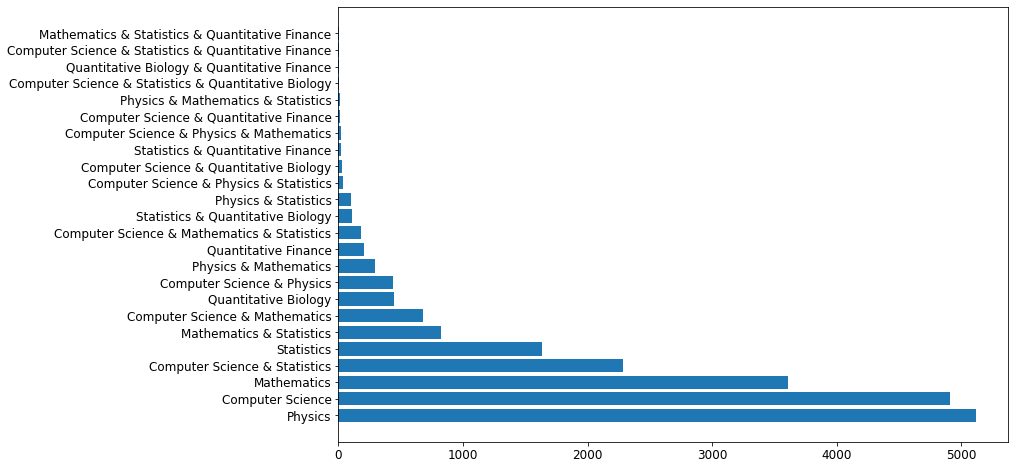

In [14]:
tags = df["topic"].value_counts().index
counts = df["topic"].value_counts().values

plt.figure(figsize = (12,8))
plt.tight_layout()
plt.barh(tags,counts)
plt.savefig("../plots/CountOfCombinedTopic.png",bbox_inches='tight');

In [15]:
# preprocessing
def clean_text(text):
    
    text = text.replace("\n"," ")     # replace "\n" with " "
    text = text.replace("-"," ")       # replace "-" with " "
    text = text.lower()
    # remove numbers
    text = re.sub(r"[0-9]","",text)
    # replace mathematical expressions (like $\omega$ ...) to [math_expr]
    text = re.sub(r"\$(.*?)\$","math_expr", text)  
    text = re.sub(r"\\+begin{equation}(.*?)\\end{equation}","math_expr",text)            

    # reduce text to lexicon entry
    lemmas = [token.lemma_ for token in nlp(text)
              # keep only nouns, verbs, adjectives, adverbs and proper nouns
              if token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'}]
    
    return ' '.join(lemmas)

In [16]:
%%time
df["clean_text"] = df["text"].apply(clean_text)
df["clean_text"].head()

CPU times: user 3min 23s, sys: 160 ms, total: 3min 23s
Wall time: 3min 23s


ID
1    reconstruct subject specific effect map predic...
2    rotation invariance neural network rotation in...
3    spherical polyharmonic poisson kernel polyharm...
4    finite element approximation stochastic maxwel...
5    comparative study discrete wavelet transform w...
Name: clean_text, dtype: object

In [17]:
print(df.text[6],"\n")
print(df.clean_text[6])

On maximizing the fundamental frequency of the complement of an obstacle  Let $\Omega \subset \mathbb{R}^n$ be a bounded domain satisfying a
Hayman-type asymmetry condition, and let $ D $ be an arbitrary bounded domain
referred to as "obstacle". We are interested in the behaviour of the first
Dirichlet eigenvalue $ \lambda_1(\Omega \setminus (x+D)) $. First, we prove an
upper bound on $ \lambda_1(\Omega \setminus (x+D)) $ in terms of the distance
of the set $ x+D $ to the set of maximum points $ x_0 $ of the first Dirichlet
ground state $ \phi_{\lambda_1} > 0 $ of $ \Omega $. In short, a direct
corollary is that if \begin{equation} \mu_\Omega := \max_{x}\lambda_1(\Omega
\setminus (x+D)) \end{equation} is large enough in terms of $ \lambda_1(\Omega)
$, then all maximizer sets $ x+D $ of $ \mu_\Omega $ are close to each maximum
point $ x_0 $ of $ \phi_{\lambda_1} $.
Second, we discuss the distribution of $ \phi_{\lambda_1(\Omega)} $ and the
possibility to inscribe wavelength balls at a g

In [18]:
stopwords = set(STOPWORDS) # this is taken by wordcloud library

def plotWordCloud(df : pd.DataFrame, ax, column : str):
    """Given the dataframe, matplotlib Axes object and target column plot the wordcloud"""
    
    df_filtered = df[df[column] == 1]
    texts = df_filtered["clean_text"].values
    text_all = " ".join(text for text in texts)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_all)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(column)
    ax.axis("off")

CPU times: user 17.4 s, sys: 484 ms, total: 17.9 s
Wall time: 17.9 s


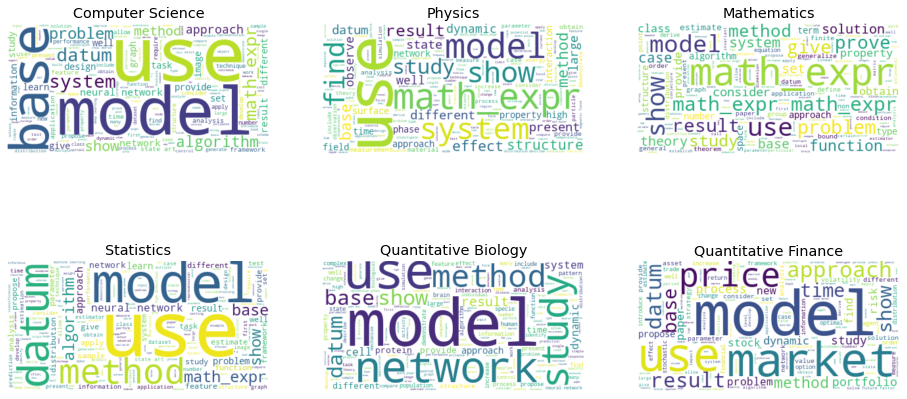

In [19]:
%%time
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(16,8))
for ax,topic in zip((ax1, ax2, ax3, ax4, ax5, ax6),target_labels):
    plotWordCloud(df,ax,topic)
plt.savefig("../plots/wordclouds.png")

In [20]:
from collections import Counter
counter = Counter(word for text in df["clean_text"].values for word in text.split() if not word in nlp.Defaults.stop_words)
counter_dict = dict(counter.most_common(40))
counter.most_common(20)

[('math_expr', 26855),
 ('model', 18920),
 ('use', 17642),
 ('method', 11820),
 ('network', 11468),
 ('result', 10800),
 ('datum', 10406),
 ('system', 10199),
 ('base', 9898),
 ('problem', 9571),
 ('propose', 8888),
 ('time', 8667),
 ('algorithm', 8619),
 ('approach', 7574),
 ('study', 7563),
 ('paper', 7503),
 ('function', 6486),
 ('state', 6465),
 ('high', 6196),
 ('present', 5817)]

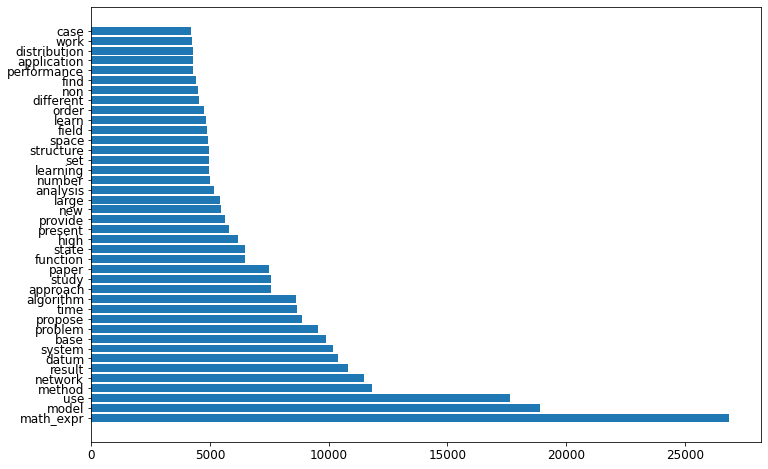

In [21]:
plt.figure(figsize = (12,8))
plt.barh(list(counter_dict.keys()),list(counter_dict.values()))
plt.savefig("../plots/commonWords.png");

In [22]:
def print_most_commons(counter : Counter):
    for word,count in counter:
        print("{:<10}:{:>10}".format(word,count))

common_word_list = []
for topic in target_labels:
    print("\nMost common 10 words and their counts for topic \033[1m{}\033[0m:".format(topic))
    df_filtered = df[df[topic] == 1]
    counter = Counter(word for text in df_filtered["clean_text"].values for word in text.split() if not word in nlp.Defaults.stop_words)
    common_word_list.append(list(dict(counter.most_common(10)).keys()))
    print_most_commons(counter.most_common(10))


Most common 10 words and their counts for topic Computer Science:
use       :      9177
model     :      8909
network   :      8422
method    :      6337
algorithm :      6198
math_expr :      6151
base      :      5883
problem   :      5817
propose   :      5811
datum     :      5750

Most common 10 words and their counts for topic Physics:
math_expr :      6487
model     :      4767
use       :      4665
system    :      3512
field     :      3055
result    :      2843
state     :      2743
high      :      2693
study     :      2609
time      :      2567

Most common 10 words and their counts for topic Mathematics:
math_expr :     15438
problem   :      2933
result    :      2924
function  :      2637
model     :      2573
use       :      2486
space     :      2234
group     :      2183
paper     :      2088
method    :      2025

Most common 10 words and their counts for topic Statistics:
model     :      7799
use       :      5506
datum     :      5128
method    :      5107
netw

In [23]:
# flatten the list
common_word_list_flat = [word for word_list in common_word_list for word in word_list]
#create counter object particular topic
common_word_counter = Counter(common_word_list_flat)
common_word_counter.most_common(10)
# here we can consider use, model, method and result as a field specific stopwords

[('use', 6),
 ('model', 6),
 ('method', 4),
 ('math_expr', 4),
 ('result', 4),
 ('network', 3),
 ('base', 3),
 ('problem', 3),
 ('datum', 3),
 ('algorithm', 2)]

In [24]:
# update the stop words
nlp.Defaults.stop_words |= {"use","model","method","result"}
# base, approach, find, problem, provide, propose
stop_words = set(nlp.Defaults.stop_words)

def remove_stopwords(text):
    # remove stopwords
    tokens = [token.text for token in nlp(text) if token.text not in stop_words]
    return ' '.join(tokens)         

In [25]:
%%time
df["clean_text"] = df["clean_text"].apply(remove_stopwords)
df["clean_text"].head()

CPU times: user 1min 58s, sys: 0 ns, total: 1min 58s
Wall time: 1min 58s


ID
1    reconstruct subject specific effect map predic...
2    rotation invariance neural network rotation in...
3    spherical polyharmonic poisson kernel polyharm...
4    finite element approximation stochastic maxwel...
5    comparative study discrete wavelet transform w...
Name: clean_text, dtype: object

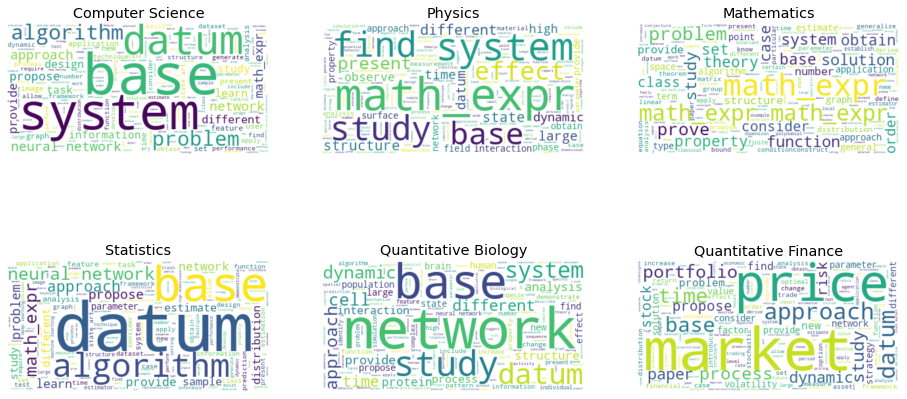

In [26]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(16,8))
for ax,topic in zip((ax1, ax2, ax3, ax4, ax5, ax6),target_labels):
    plotWordCloud(df,ax,topic)
plt.savefig("../plots/wordcloudsStopWordsRemoved.png")

In [27]:
# save the clean data
df.to_excel("../data/clean_train.xlsx",index_label="ID")

### MultiOutputClassifier

After analyzing the topic columns, it is obvious to realize that some papers has more than one label. This problem is known as [multi-label classification](https://scikit-learn.org/stable/modules/multiclass.html). It can be solved by [sklearn](https://scikit-learn.org/stable/) library.

In [28]:
%%time
# transform texts into a matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                             min_df=0.001, 
                             max_df=0.75, 
                             stop_words='english')

X = vectorizer.fit_transform(df['clean_text'])
print(X.shape)

(20972, 9064)
CPU times: user 3.77 s, sys: 92 ms, total: 3.86 s
Wall time: 3.86 s


In [29]:
# convert target variable to np.arrays
y = np.array([np.array(l) for l in df["onehot_encoded"].values])
print(y.shape)

(20972, 6)


Below approach is unable to detect the correlation among the classes

In [30]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

In [31]:
classifier = LogisticRegression(n_jobs=-1, class_weight='balanced')
multi_target = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target.fit(X, y)

MultiOutputClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                   n_jobs=-1),
                      n_jobs=-1)

#### Interpret the Result of Multi Output Classifier

In [32]:
target_classifier = dict(zip(target_labels,multi_target.estimators_))

In [33]:
def printCoefOfWord(word,classifiers):
    """ Given the word print the coefficient of word for each classifier"""
    position = vectorizer.vocabulary_[word]
    for target in target_classifier:
        print("{:<25}:{:>10}".format(target,classifiers.get(target).coef_[0, position]))

In [34]:
wordsToCheck = ["math_expr", "distribution", "algorithm","cell","economy","velocity"]
for word in wordsToCheck:
    print("\033[1m{}\033[0m".format(word))
    printCoefOfWord(word,target_classifier)
    print("\n")

math_expr
Computer Science         :-1.0615956320612523
Physics                  :-1.4551755650971252
Mathematics              :2.2137039172225754
Statistics               :-1.4283500525243094
Quantitative Biology     :-2.983544051866761
Quantitative Finance     :-3.799153866127881


distribution
Computer Science         :-0.6003750478095982
Physics                  :-0.26287873888539476
Mathematics              :0.5348471165112341
Statistics               :3.846233902826429
Quantitative Biology     :1.1222400003977206
Quantitative Finance     :-0.033226663794774264


algorithm
Computer Science         :3.4728590287979504
Physics                  :-2.7992623321855334
Mathematics              :-1.501540607117523
Statistics               :2.08050352983329
Quantitative Biology     :-0.22376751189848387
Quantitative Finance     :-1.2270390862254288


cell
Computer Science         :-1.2330356283819512
Physics                  :-1.2288437817988593
Mathematics              :-1.025915633568610

#### Evaluation of the Model

To evaluate the performance of the model, 5 metrics will be used. Precision, recall, F1 and accuracy (custom function is written) and exact match ratio (accuracy in sklearn). Those metrics will be estimated by using 5 fold cross validation.

**Explain the average strategy to continue**

In [35]:
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.metrics import make_scorer

In [36]:
def printAvgOfMetrics(cvResults):
    print("*"*32)
    for metric in cvResults:
        if metric != "fit_time" and metric != "score_time":
            print("{:<20}:{:>10}".format(metric,round(np.mean(cv_results.get(metric)),3)))
    print("*"*32)

In [37]:
def accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[0]

acc = make_scorer(accuracy)

In [38]:
for k in [2,3,5,10]:
    cv_results = cross_validate(multi_target, X, y, cv=k, n_jobs=-1,
                            scoring=({"accuracy" : acc, "emr":"accuracy",
                                      "precision":"precision_weighted",
                                      "recall":"recall_weighted","f1":"f1_weighted"}))
    fold_size = X.shape[0]/k
    print("Result of \033[1mk = {}\033[0m:".format(k))
    printAvgOfMetrics(cv_results)
    print("Training on {} instances/fold, testing on {}\n".format(int(fold_size*(k-1)), int(fold_size)))

Result of k = 2:
********************************
test_accuracy       :     0.779
test_emr            :     0.628
test_precision      :     0.782
test_recall         :     0.864
test_f1             :      0.82
********************************
Training on 10486 instances/fold, testing on 10486

Result of k = 3:
********************************
test_accuracy       :     0.783
test_emr            :     0.633
test_precision      :     0.783
test_recall         :      0.87
test_f1             :     0.822
********************************
Training on 13981 instances/fold, testing on 6990

Result of k = 5:
********************************
test_accuracy       :     0.784
test_emr            :     0.634
test_precision      :     0.783
test_recall         :     0.873
test_f1             :     0.824
********************************
Training on 16777 instances/fold, testing on 4194

Result of k = 10:
********************************
test_accuracy       :     0.786
test_emr            :     0.635
te

In [39]:
# choose the best regularizaiton parameter by using cv
best_c = None
best_f1_score = 0.0

for c in [50, 20, 10, 1.0, 0.5, 0.1, 0.05, 0.01]:
    classifier = LogisticRegression(C = c, n_jobs=-1, class_weight='balanced')
    multi_target = MultiOutputClassifier(classifier, n_jobs=-1)
    cv_reg = cross_val_score(multi_target, X, y=y, cv=5, n_jobs=-1, scoring="f1_weighted").mean()

    print("5-CV on train at C={}: {}".format(c, cv_reg.mean()))

    if cv_reg > best_f1_score:
        best_f1_score = cv_reg
        best_c = c
        
print("best C parameter: {}".format(best_c))

5-CV on train at C=50: 0.7941663423637995
5-CV on train at C=20: 0.8062882308965558
5-CV on train at C=10: 0.8145928685433914
5-CV on train at C=1.0: 0.8239771760613337
5-CV on train at C=0.5: 0.821448145484494
5-CV on train at C=0.1: 0.8074946715588673
5-CV on train at C=0.05: 0.7999028432112878
5-CV on train at C=0.01: 0.7826459430997483
best C parameter: 1.0


In [40]:
# select the best features to have better performance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [41]:
numFeatures = np.linspace(1000, X.shape[1],10)
for n_feat in numFeatures:
    # select features
    selector = SelectKBest(chi2, k=int(n_feat)).fit(X, y)
    X_sel = selector.transform(X)
    # calculate the f1
    classifier = LogisticRegression(C = best_c, n_jobs=-1, class_weight='balanced')
    multi_target = MultiOutputClassifier(classifier, n_jobs=-1)
    cv_reg = cross_val_score(multi_target, X_sel, y=y, cv=5, n_jobs=-1, scoring="f1_weighted").mean()
    print("Selected number of features {}, 5-CV on train: {}".format(X_sel.shape[1],cv_reg.mean()))

Selected number of features 1000, 5-CV on train: 0.8050536542531441
Selected number of features 1896, 5-CV on train: 0.8145812807209485
Selected number of features 2792, 5-CV on train: 0.81756521143312
Selected number of features 3688, 5-CV on train: 0.82067438901395
Selected number of features 4584, 5-CV on train: 0.8226671983743301
Selected number of features 5480, 5-CV on train: 0.823310062638388
Selected number of features 6376, 5-CV on train: 0.8237456317189217
Selected number of features 7272, 5-CV on train: 0.824154887253083
Selected number of features 8168, 5-CV on train: 0.8239066577179168
Selected number of features 9064, 5-CV on train: 0.8239771760613337


In [42]:
# getting insights
features = vectorizer.get_feature_names() # get the names of the features
top_scores = selector.scores_.argsort()[-9064:] # get the indices of the selection
best_indicator_terms = [features[i] for i in sorted(top_scores)] # sort feature names

# get for each classifiers
df_indicator = pd.DataFrame(data = {'feature': best_indicator_terms})
for classifier in target_classifier:
    col_name = classifier + "_coefficient"
    df_indicator[col_name] = target_classifier.get(classifier).coef_[0]

In [43]:
df_indicator.sort_values('Quantitative Biology_coefficient',ascending=False).head(20)

,feature,Computer Science_coefficient,Physics_coefficient,Mathematics_coefficient,Statistics_coefficient,Quantitative Biology_coefficient,Quantitative Finance_coefficient
916,brain,-2.667578,-0.738109,-0.873204,-0.320175,8.246298,-0.616510
1044,cell,-1.233036,-1.228844,-1.025916,-1.289256,6.772875,-1.325683
6575,protein,-1.799064,-0.407597,-0.930909,0.301450,6.322842,-0.600471
6162,population,-0.964687,0.424263,-1.197336,-0.548165,6.100409,-0.324674
2314,dna,-0.499044,-0.259411,-0.845297,0.032984,5.667338,-0.366883
5413,neuroscience,-1.231112,-0.508651,0.521276,-0.012014,5.519116,0.403082
3313,gene,-1.437849,-1.727643,-0.377079,1.586072,5.399129,-0.496799
849,biological,-1.123625,-0.127780,-0.869190,0.178194,5.322925,0.587201
367,animal,-1.314936,-0.368630,-0.727393,0.045708,4.716513,-0.309920
5753,organism,-1.059732,-0.675340,-0.340324,-0.133976,4.350098,-0.336827


In [44]:
def plotDescriptiveWords(df , topic, ax):
    df[["feature",topic+"_coefficient"]].sort_values(topic+"_coefficient",ascending=False)[:10].plot(x="feature",y = topic+"_coefficient"
                                                                                                    ,kind="bar",title = "Descriptive Words of " + topic
                                                                                                    ,legend=False, xlabel = "Words", ylabel = "Coefficients"
                                                                                                    ,rot=20, ax = ax,fontsize=13.5);

CPU times: user 1.04 s, sys: 56 ms, total: 1.1 s
Wall time: 1.1 s


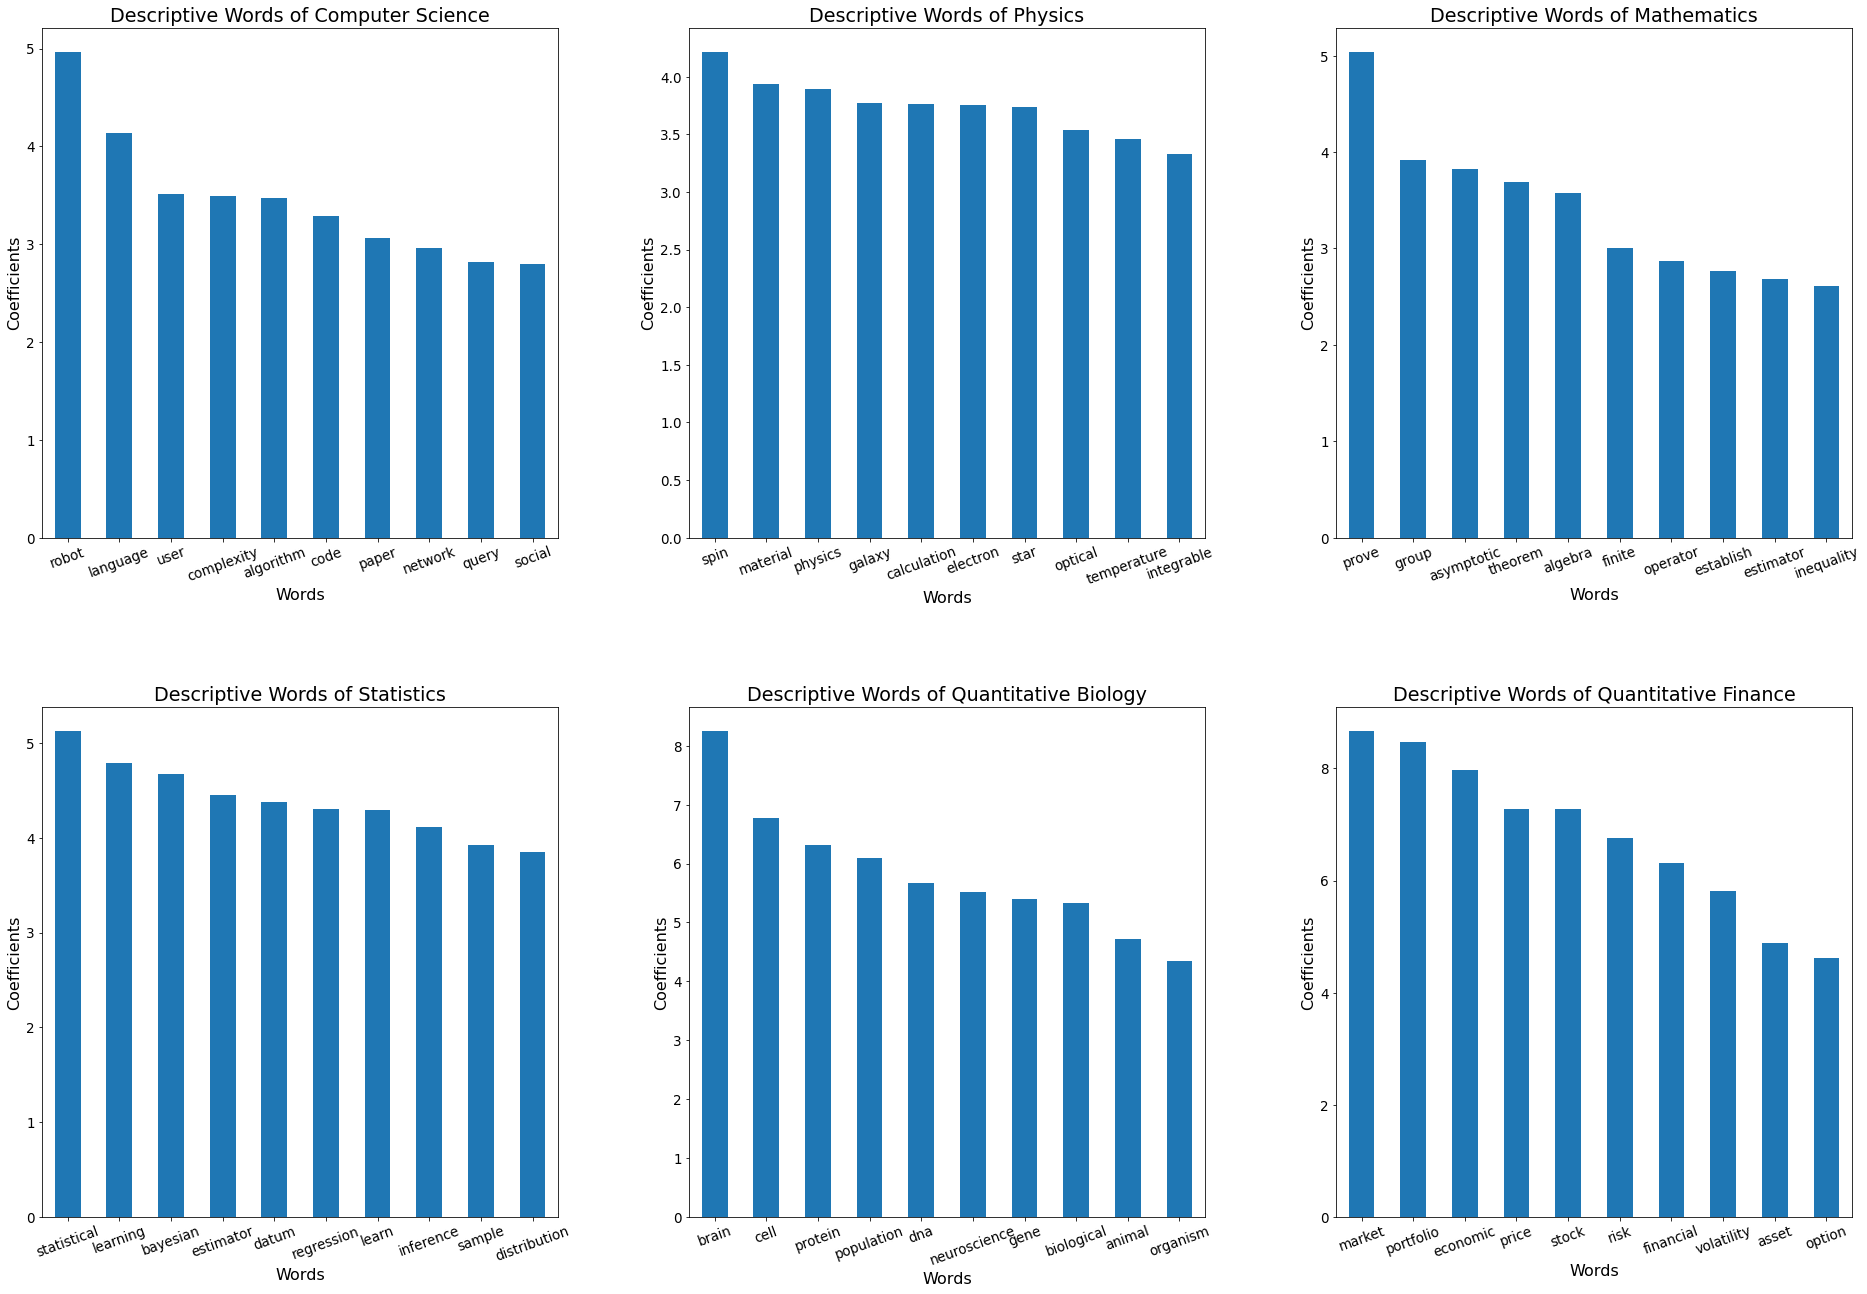

In [45]:
%%time
plt.rcParams.update({'font.size': 16})
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(28,20))
for ax,topic in zip((ax1, ax2, ax3, ax4, ax5, ax6),target_labels):
    plotDescriptiveWords(df_indicator,topic,ax)
fig.tight_layout(pad=5)
plt.savefig("../plots/descriptiveWords.png")

### Chain Classifier

Another approach to solve the multi label classification problems is using classifier chains. With this method we will be able to preserve the label correlation.

In [46]:
from sklearn.multioutput import ClassifierChain

classifier = LogisticRegression(n_jobs=-1, class_weight='balanced')
chain = ClassifierChain(classifier)
chain.fit(X, y)

ClassifierChain(base_estimator=LogisticRegression(class_weight='balanced',
                                                  n_jobs=-1))

In [47]:
chain_classifiers = dict(zip(target_labels,chain.estimators_))

In [48]:
wordsToCheck = ["math_expr", "prove", "algorithm","cell","economy","velocity"]
for word in wordsToCheck:
    print("\033[1m{}\033[0m".format(word))
    printCoefOfWord(word,chain_classifiers)
    print("\n")

math_expr
Computer Science         :-1.0615956320627875
Physics                  :-1.7635357860480032
Mathematics              :2.081948247955602
Statistics               :-1.465151457548711
Quantitative Biology     :-1.9395629439051074
Quantitative Finance     :-2.1595248189151537


prove
Computer Science         :-1.0794161031265648
Physics                  :-4.366471482056237
Mathematics              :3.871611658990964
Statistics               :-1.589073188247326
Quantitative Biology     :-0.7444234509954505
Quantitative Finance     :-0.7120990442662184


algorithm
Computer Science         :3.4728590287952033
Physics                  :-2.1288597893510874
Mathematics              :-1.1987482676593302
Statistics               :1.9305958819213362
Quantitative Biology     :0.5278940865639982
Quantitative Finance     :-0.39222298728930954


cell
Computer Science         :-1.233035628387243
Physics                  :-1.5175519490093834
Mathematics              :-1.8166175602967787
Statist

In [49]:
for k in [2,3,5,10]:
    cv_results = cross_validate(chain, X, y, cv=k, n_jobs=-1,
                                scoring=({"accuracy" : acc, "emr":"accuracy",
                                          "precision":"precision_weighted",
                                          "recall":"recall_weighted","f1":"f1_weighted"}))
    fold_size = X.shape[0]/k
    print("Result of \033[1mk = {}\033[0m:".format(k))
    printAvgOfMetrics(cv_results)
    print("Training on {} instances/fold, testing on {}\n".format(int(fold_size*(k-1)), int(fold_size)))

Result of k = 2:
********************************
test_accuracy       :     0.779
test_emr            :     0.651
test_precision      :     0.784
test_recall         :     0.836
test_f1             :     0.807
********************************
Training on 10486 instances/fold, testing on 10486

Result of k = 3:
********************************
test_accuracy       :     0.784
test_emr            :     0.656
test_precision      :     0.789
test_recall         :     0.841
test_f1             :     0.812
********************************
Training on 13981 instances/fold, testing on 6990

Result of k = 5:
********************************
test_accuracy       :     0.786
test_emr            :     0.657
test_precision      :      0.79
test_recall         :     0.845
test_f1             :     0.815
********************************
Training on 16777 instances/fold, testing on 4194

Result of k = 10:
********************************
test_accuracy       :     0.788
test_emr            :     0.659
te

In [50]:
# choose the best regularizaiton parameter by using cv

best_c = None
best_f1_score = 0.0

for c in [50, 20, 10, 1.0, 0.5, 0.1, 0.05, 0.01]:
    classifier = LogisticRegression(C = c, n_jobs=-1, class_weight='balanced')
    chain = ClassifierChain(classifier)
    cv_reg = cross_val_score(chain, X, y=y, cv=5, n_jobs=-1, scoring="f1_weighted").mean()

    print("5-CV on train at C={}: {}".format(c, cv_reg.mean()))

    if cv_reg > best_f1_score:
        best_f1_score = cv_reg
        best_c = c
        
print("best C parameter: {}".format(best_c))

5-CV on train at C=50: 0.7891777771937006
5-CV on train at C=20: 0.8010784904007668
5-CV on train at C=10: 0.8090365280786529
5-CV on train at C=1.0: 0.8150651687456906
5-CV on train at C=0.5: 0.8083664516117718
5-CV on train at C=0.1: 0.7713795195495693
5-CV on train at C=0.05: 0.7356552554552861
5-CV on train at C=0.01: 0.534537507019343
best C parameter: 1.0


In [51]:
numFeatures = np.linspace(1000, X.shape[1],10)
for n_feat in numFeatures:
    # select features
    selector = SelectKBest(chi2, k=int(n_feat)).fit(X, y)
    X_sel = selector.transform(X)
    # calculate the f1
    classifier = LogisticRegression(C = best_c, n_jobs=-1, class_weight='balanced')
    chain = ClassifierChain(classifier)
    cv_reg = cross_val_score(chain, X_sel, y=y, cv=5, n_jobs=-1, scoring="f1_weighted").mean()
    print("Selected number of features {}, 5-CV on train: {}".format(X_sel.shape[1],cv_reg.mean()))

Selected number of features 1000, 5-CV on train: 0.7989811193941803
Selected number of features 1896, 5-CV on train: 0.8080816264874091
Selected number of features 2792, 5-CV on train: 0.8103030916140588
Selected number of features 3688, 5-CV on train: 0.81307489740836
Selected number of features 4584, 5-CV on train: 0.8155421652479153
Selected number of features 5480, 5-CV on train: 0.8153588608711745
Selected number of features 6376, 5-CV on train: 0.815208376721983
Selected number of features 7272, 5-CV on train: 0.8151334484722718
Selected number of features 8168, 5-CV on train: 0.8147703013466703
Selected number of features 9064, 5-CV on train: 0.8150651687456906


In [52]:
# getting insights
features = vectorizer.get_feature_names() # get the names of the features
top_scores = selector.scores_.argsort()[-9064:] # get the indices of the selection
best_indicator_terms = [features[i] for i in sorted(top_scores)] # sort feature names

# get for each classifiers
df_indicator = pd.DataFrame(data = {'feature': best_indicator_terms})
for classifier in chain_classifiers:
    col_name = classifier + "_coefficient"
    print(chain_classifiers.get(classifier).coef_[0][9064:])
    df_indicator[col_name] = chain_classifiers.get(classifier).coef_[0][:9064]

[]
[-1.33723892]
[-1.6671661  -2.55460203]
[-1.33448246 -2.59929016 -1.02713679]
[-5.15252677 -8.76100966 -7.47342528 -3.28559742]
[-6.15498747 -8.41700353 -7.16137283 -4.52980351 -4.79239504]


In [53]:
df_indicator.sort_values('Computer Science_coefficient',ascending=False).head(20)

,feature,Computer Science_coefficient,Physics_coefficient,Mathematics_coefficient,Statistics_coefficient,Quantitative Biology_coefficient,Quantitative Finance_coefficient
7182,robot,4.963977,-1.964827,-1.856649,-1.330210,-0.750440,-0.693443
4281,language,4.135215,-0.908330,-1.568984,-0.945558,-1.012341,-0.868815
8771,user,3.517854,-0.881149,-1.125217,-0.816833,-1.809400,-1.739232
1354,complexity,3.489764,-0.834398,-0.689007,0.381032,-0.439852,-0.376533
209,algorithm,3.472859,-2.128860,-1.198748,1.930596,0.527894,-0.392223
1216,code,3.291568,0.010176,0.362668,-0.656539,-0.906524,-0.558223
5821,paper,3.065230,-4.720923,1.441633,-0.413231,-2.955085,-0.319415
5328,network,2.959410,2.002610,-1.247500,1.576516,2.370169,0.312992
6732,query,2.821850,-1.214417,-1.358048,-0.750060,-0.808927,-0.448995
7641,social,2.798462,1.531212,-0.577797,0.010387,1.273100,0.925696


CPU times: user 1 s, sys: 32 ms, total: 1.03 s
Wall time: 1.03 s


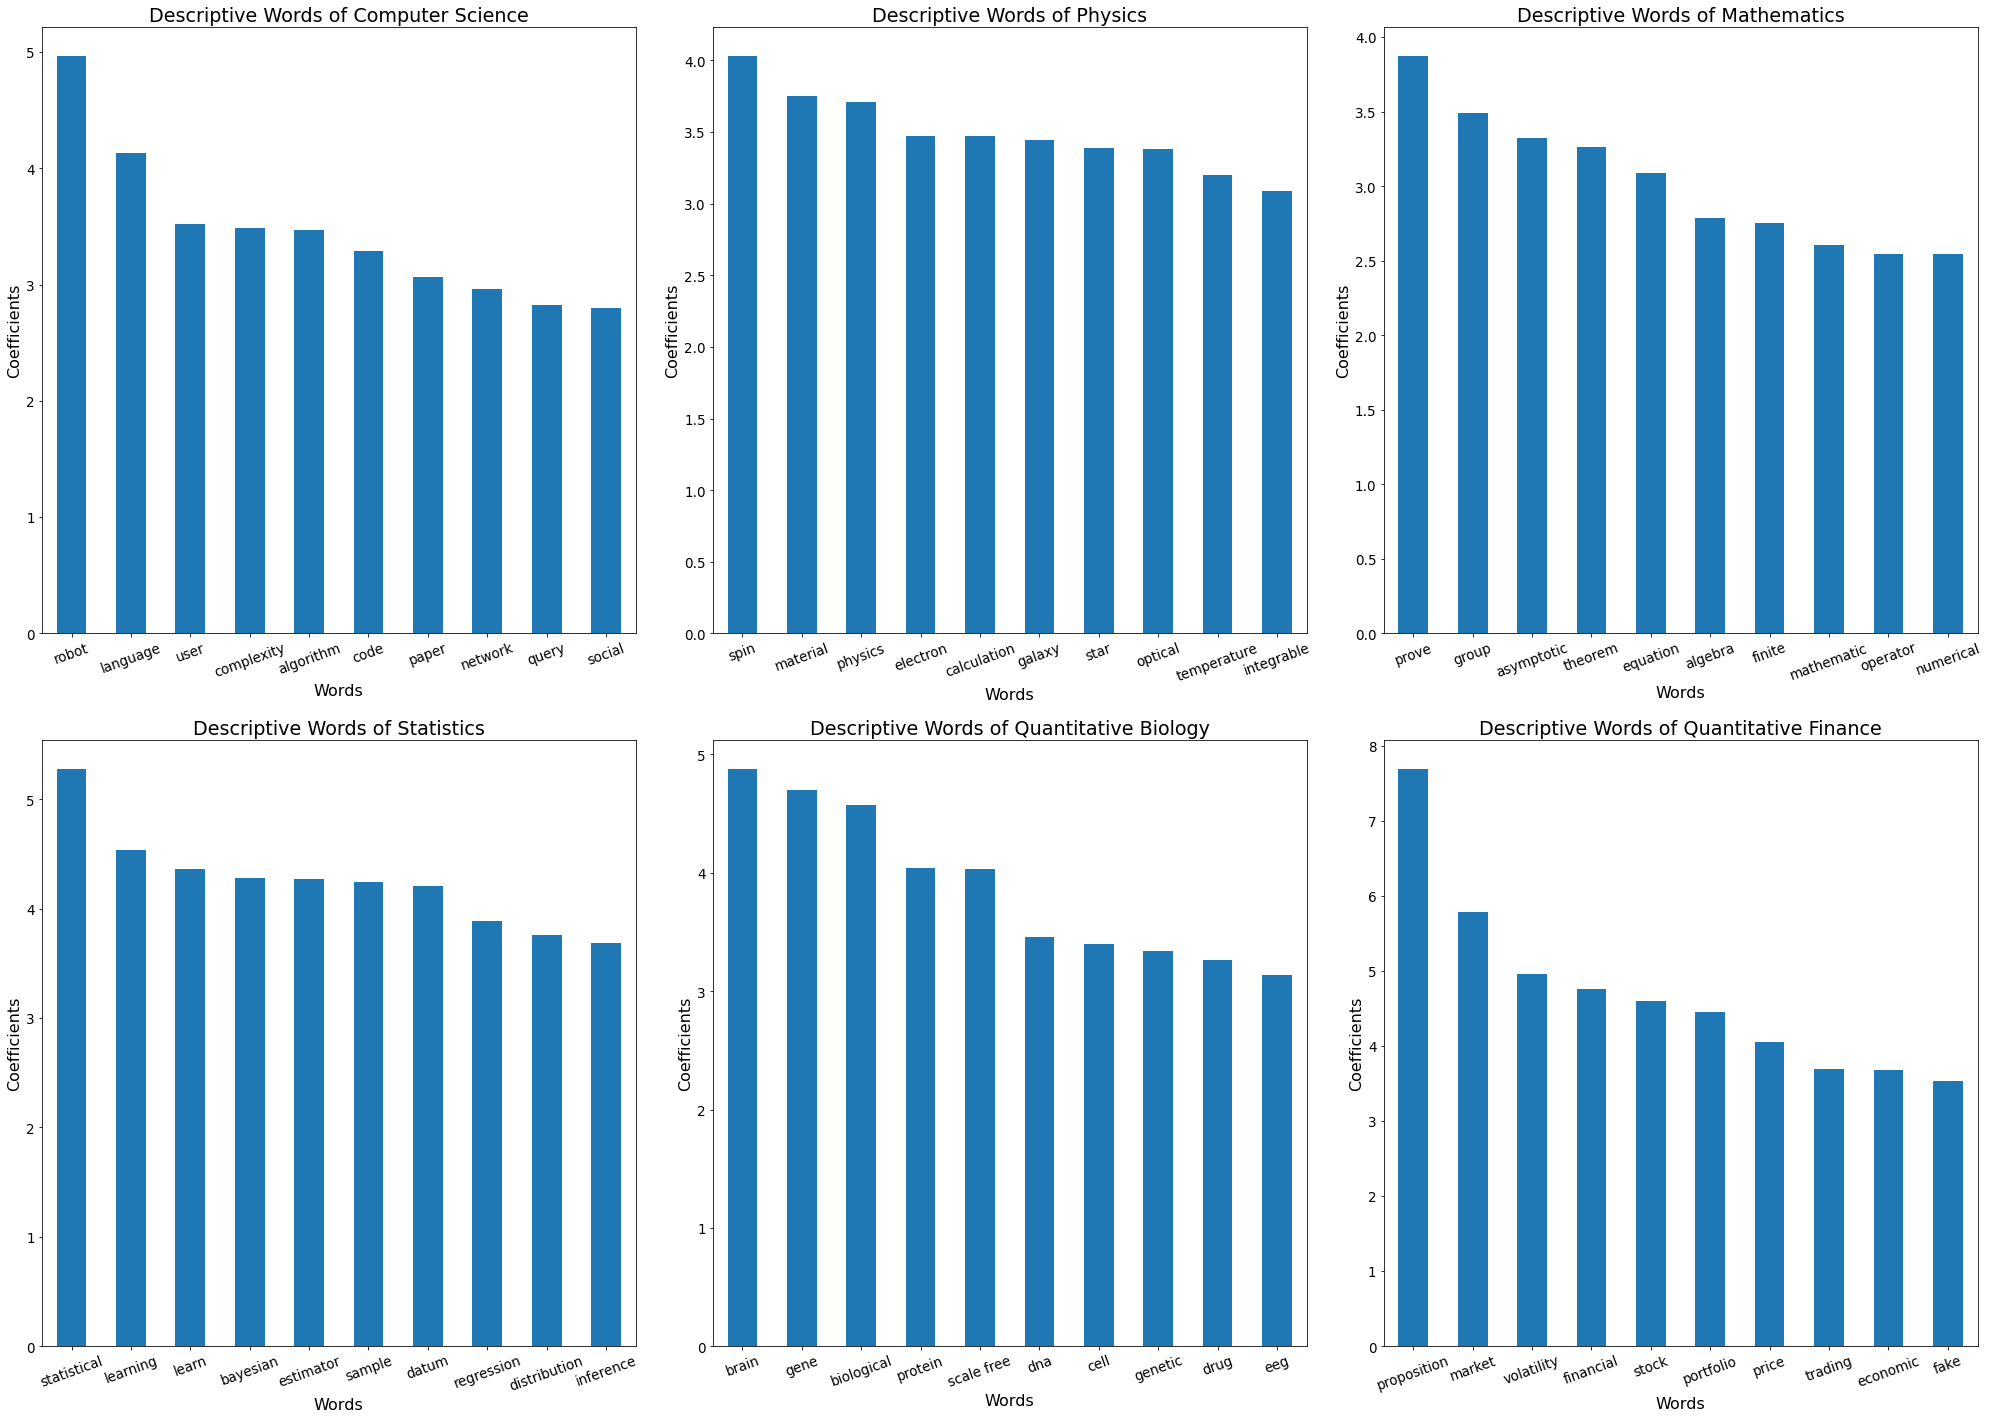

In [54]:
%%time
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(28,20))
for ax,topic in zip((ax1, ax2, ax3, ax4, ax5, ax6),target_labels):
    plotDescriptiveWords(df_indicator,topic,ax)
fig.tight_layout()
plt.savefig("../plots/chainDescriptiveWords.png")

### Guided LDA

In [55]:
import guidedlda
from sklearn.feature_extraction.text import CountVectorizer

# vectorize input
vectorizer = CountVectorizer(analyzer='word', 
                             ngram_range=(1,2), 
                             min_df=30, 
                             max_df=0.3, 
                             stop_words='english')

X = vectorizer.fit_transform(df.clean_text.tolist())

# store lookup structures for convenience
vocab = vectorizer.get_feature_names()
word2id = dict((v, idx) for idx, v in enumerate(vocab))

print(X.shape)

(20972, 6392)


In [56]:
# define topic seeds based on intuition
indicators = {
    'LDA_Computer_Science': ["robot", "complexity", "algorithm","code","graph"],
    'LDA_Physics': ["spin", "material", "physics", "electron", "galaxy","star","optical","temperature"], 
    'LDA_Mathematics': ["prove", "asymtotic", "theorem", "equation", "algebra","mathematic","theory"],
    'LDA_Statistics': ["statistical", "learning", "estimator", "sample", "bayesian","regression","distribution","inference","statistics"],
    'LDA_Biology': ["brain", "gene", 'biological', "protein", "dna","cell","drug","population","food","human"],
    'LDA_Finance': ["market", "volatility", "financial", "stock","portfolio","price", "trading","economic","forecast","risk"]
}

topic_names, seed_topic_list = zip(*indicators.items())
# filter out all words not actually in vocab
seed_topic_list = [[w for w in words if w in set(vocab)] for words in seed_topic_list]
    
# create a mapping {word_id: k}, which we need for the model
seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id
        
print(seed_topic_list)

[['robot', 'complexity', 'algorithm', 'code', 'graph'], ['spin', 'material', 'physics', 'electron', 'galaxy', 'star', 'optical', 'temperature'], ['prove', 'theorem', 'equation', 'algebra', 'mathematic', 'theory'], ['statistical', 'learning', 'estimator', 'sample', 'bayesian', 'regression', 'distribution', 'inference'], ['brain', 'gene', 'biological', 'protein', 'dna', 'cell', 'drug', 'population', 'human'], ['market', 'volatility', 'financial', 'stock', 'portfolio', 'price', 'trading', 'economic', 'forecast', 'risk']]


In [57]:
# define model
model = guidedlda.GuidedLDA(n_topics=len(seed_topic_list), 
                            n_iter=1000, 
                            random_state=7, 
                            refresh=50, 
                            alpha=0.5, 
                            eta=0.000001)

# fit the model with seeds
doc_topic = model.fit_transform(X, seed_topics=seed_topics, seed_confidence=10)

# retrieve the word descriptors
n_top_words = 6
topic_word = model.topic_word_
descriptors_guided = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: "{}"'.format(topic_names[i], '" "'.join(topic_words)))
    descriptors_guided.append(' '.join(topic_words[:2]))

INFO:guidedlda:n_documents: 20972
INFO:guidedlda:vocab_size: 6392
INFO:guidedlda:n_words: 1835383
INFO:guidedlda:n_topics: 6
INFO:guidedlda:n_iter: 1000
INFO:guidedlda:<0> log likelihood: -18108418
INFO:guidedlda:<50> log likelihood: -14664283
INFO:guidedlda:<100> log likelihood: -14632648
INFO:guidedlda:<150> log likelihood: -14619657
INFO:guidedlda:<200> log likelihood: -14613273
INFO:guidedlda:<250> log likelihood: -14606070
INFO:guidedlda:<300> log likelihood: -14602984
INFO:guidedlda:<350> log likelihood: -14598250
INFO:guidedlda:<400> log likelihood: -14597470
INFO:guidedlda:<450> log likelihood: -14598021
INFO:guidedlda:<500> log likelihood: -14593227
INFO:guidedlda:<550> log likelihood: -14594096
INFO:guidedlda:<600> log likelihood: -14593081
INFO:guidedlda:<650> log likelihood: -14588999
INFO:guidedlda:<700> log likelihood: -14587665
INFO:guidedlda:<750> log likelihood: -14585443
INFO:guidedlda:<800> log likelihood: -14583657
INFO:guidedlda:<850> log likelihood: -14582241
INFO

Topic LDA_Computer_Science: "algorithm" "problem" "graph" "time" "optimization" "propose"
Topic LDA_Physics: "field" "phase" "energy" "state" "high" "spin"
Topic LDA_Mathematics: "math_expr" "math_expr math_expr" "equation" "space" "function" "prove"
Topic LDA_Statistics: "datum" "learning" "distribution" "sample" "propose" "parameter"
Topic LDA_Biology: "network" "neural" "deep" "image" "learn" "task"
Topic LDA_Finance: "time" "datum" "user" "study" "network" "control"


Guided LDA provides good results for the first 4 topics (Computer Science, Physics, Mathematics and Statistics). However for the last two topics (Quantitative Biology and Quantitative Finance), it doesn't perform well.It seems like for Quantitative Biology we have Deep Learning. It is most likely due to the having less data for those topics. Therefore LDA can not identify them very well.

In [58]:
lda_topics = [list(indicators.keys())[label] for label in np.argmax(model.doc_topic_,axis=1)] 
df["lda_topics"] = lda_topics

In [59]:
def getPercentages(df, topic):
    return round(df[df[topic] == 1].lda_topics.value_counts() / len(df[df[topic] == 1]) * 100,3)

In [60]:
for topic in target_labels:
    print("\033[1m{}\033[0m".format(topic))
    print(getPercentages(df,topic))
    print("*"*30)

Computer Science
LDA_Biology             29.369
LDA_Finance             29.265
LDA_Computer_Science    20.072
LDA_Statistics          12.078
LDA_Mathematics          7.575
LDA_Physics              1.641
Name: lda_topics, dtype: float64
******************************
Physics
LDA_Physics             76.933
LDA_Finance              7.633
LDA_Mathematics          7.351
LDA_Biology              2.860
LDA_Statistics           2.777
LDA_Computer_Science     2.445
Name: lda_topics, dtype: float64
******************************
Mathematics
LDA_Mathematics         66.358
LDA_Statistics          13.581
LDA_Computer_Science    11.926
LDA_Finance              4.379
LDA_Physics              3.186
LDA_Biology              0.570
Name: lda_topics, dtype: float64
******************************
Statistics
LDA_Statistics          42.566
LDA_Biology             26.450
LDA_Computer_Science    15.962
LDA_Finance             10.296
LDA_Mathematics          3.630
LDA_Physics              1.095
Name: lda_topics

In [61]:
# TODO do a pie plot for above
def plotPie(df, topic,ax):
    topics = (df[df[topic] == 1].lda_topics.value_counts() / len(df[df[topic] == 1]) * 100).index
    values = (df[df[topic] == 1].lda_topics.value_counts() / len(df[df[topic] == 1]) * 100).values
    ax.set_title(topic)
    ax.pie(values, labels = topics,autopct='%1.2f%%')

CPU times: user 597 ms, sys: 12 ms, total: 609 ms
Wall time: 608 ms


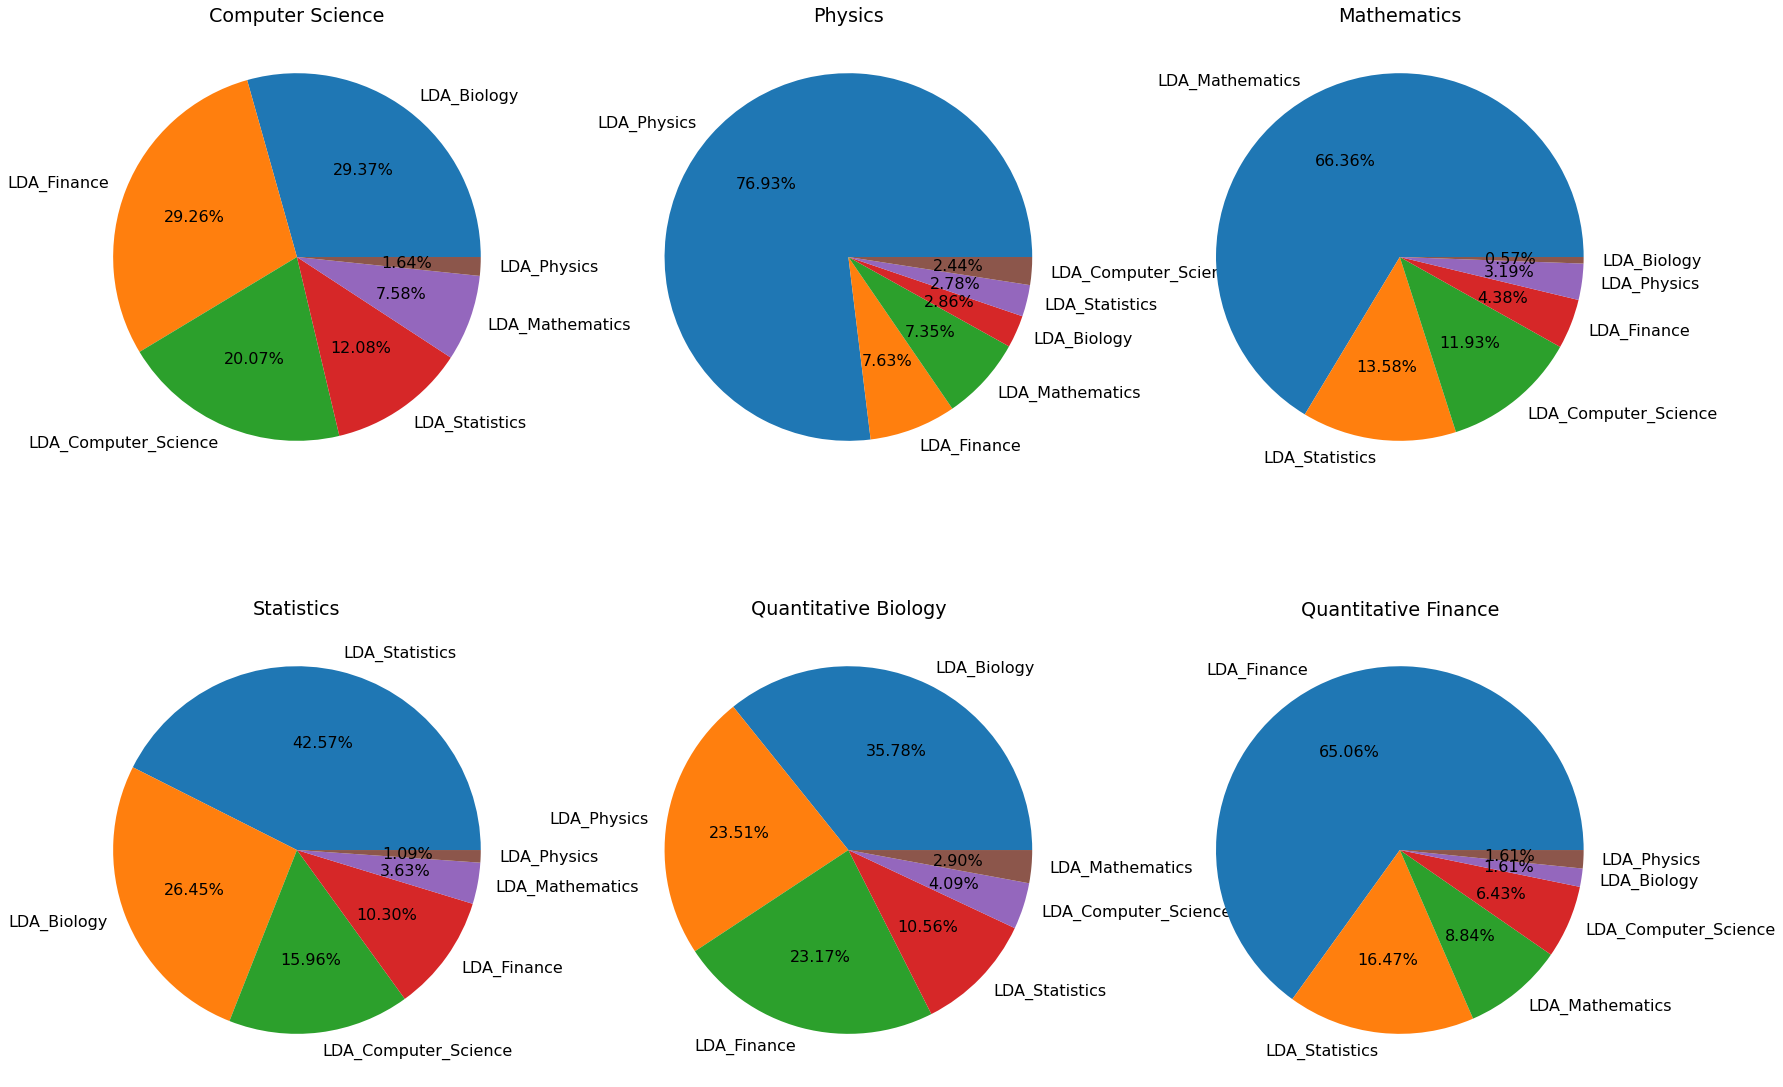

In [62]:
%%time
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(28,20))
for ax,topic in zip((ax1, ax2, ax3, ax4, ax5, ax6),target_labels):
    plotPie(df,topic,ax)
    
plt.savefig("../plots/ldaTopics.png")

### Deep Learning

In [63]:
# try to implement DL to this problem (check the shared link)
# check different DL algorithms, CNN, BERT
# report
# presentation
# bonus, maybe visualize the interpretability results